# IPW, stablized IPW

In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Ridge
import utils as utl

In [2]:
data = pkl.load(open('../data/data_p.pkl', 'rb'))
data.head(2)

,confidence,index,time,token_path,term_match,word_net,T,Y,propensity
0,46.0,16,17.0,14.2148,12.0,11.2946,1,80,0.064056
1,37.4,16,13.0,14.2148,12.0,11.2946,0,28,0.047381


## IPW

In [3]:
def IPW(df):
    records = df.shape[0]
    t1 = (df[df['T']==1]['Y'] / df[df['T']==1]['propensity']).sum() / records
    t2 = (df[df['T']==0]['Y'] / (1-df[df['T']==0]['propensity'])).sum() / records
    return t1-t2

In [4]:
print(f"IPW ATE over original data: {IPW(data)}")

IPW ATE over original data: 9.586359958064989


In [5]:
IPW_results = utl.generate_CI(data, IPW, f_kwargs={}, samples=1000, alpha=0.95)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.60it/s]


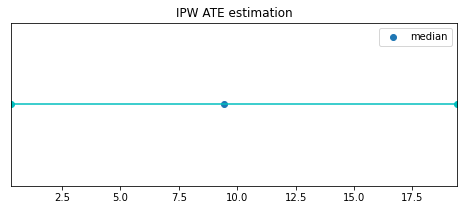

In [6]:
plt.figure(figsize=(8,3))
plot = (
            'm',
            # 'a',
        )
utl.plot_CI(**IPW_results, plot=plot, title='IPW ATE estimation', xlim_l=None, xlim_u=None)

## Stablized IPW

In [7]:
def stablized_IPW(df):
    T, NT = df[df['T']==1], df[df['T']==0]
    t1 = (1/(1 / T['propensity']).sum()) * (T['Y'] / T['propensity']).sum()
    t2 = (1/(1 / (1-NT['propensity'])).sum()) * (NT['Y'] / (1-NT['propensity'])).sum()
    return t1-t2

In [8]:
print(f"Stablized IPW ATE over original data: {stablized_IPW(data)}")

Stablized IPW ATE over original data: 12.782876876310723


In [9]:
stablized_IPW_results = utl.generate_CI(data, stablized_IPW, f_kwargs={}, samples=1000, alpha=0.95)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 372.54it/s]


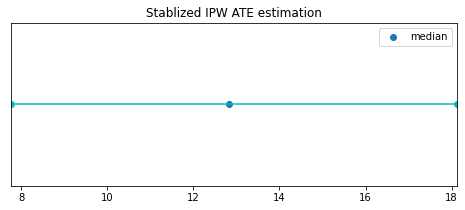

In [10]:
plt.figure(figsize=(8,3))
utl.plot_CI(**stablized_IPW_results, plot=plot, title='Stablized IPW ATE estimation', xlim_l=None, xlim_u=None)

## Saving

In [11]:
save = True
saving_list = [(IPW_results, 'IPW'), (stablized_IPW_results, 'stablized IPW')]
if save:
    for var, name in saving_list:
        pkl.dump(var, open(f'../results/{name}', 'wb'))